In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import pickle
import json

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\kakka\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


LR :  0.1  ACCURACY :  0.8489000201225281
LR :  0.01  ACCURACY :  0.7379000186920166
LR :  0.001  ACCURACY :  0.2092999964952469
LR :  0.0001  ACCURACY :  0.10109999775886536


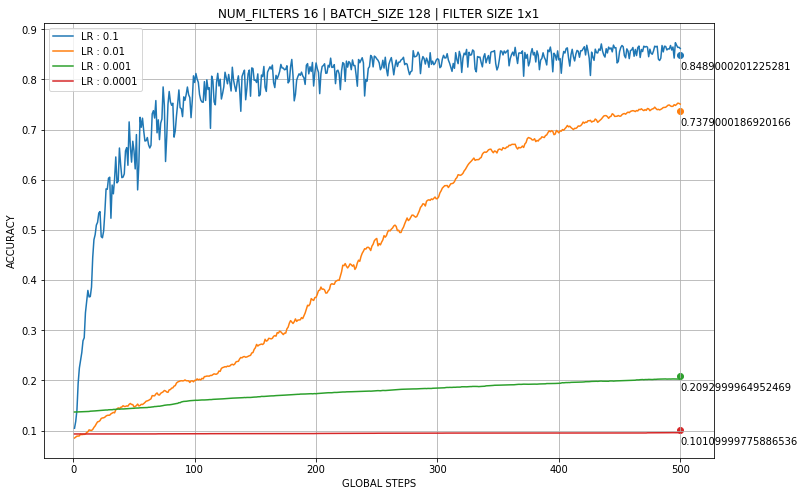

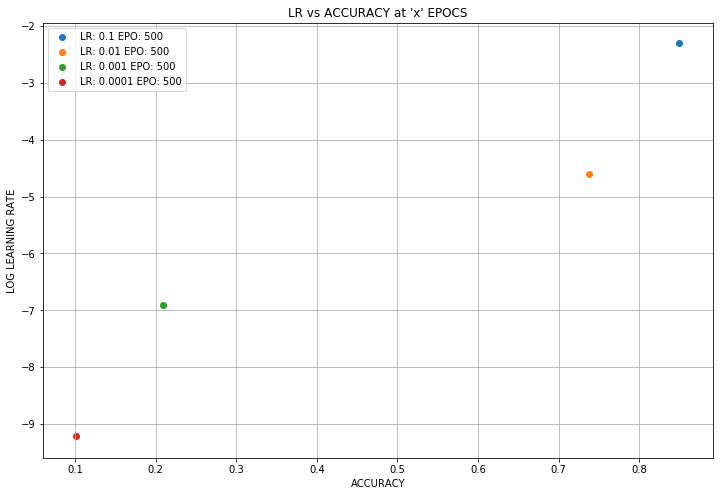

In [6]:
# class JSONEnc(json.JSONEncoder):
#     def default(self, obj):
#         if isinstance(obj, np.integer):
#             return int(obj)
#         elif isinstance(obj, np.floating):
#             return float(obj)
#         elif isinstance(obj, np.ndarray):
#             return obj.tolist()
#         else:
#             return super(JSONEnc, self).default(obj)

def graphit(base_path, lrs, combifiles = False):
    accuracy = [[] for i in range(len(lrs))]
    loss = [[] for i in range(len(lrs))]
    global_step = [[] for i in range(len(lrs))]

    fig = plt.figure(figsize=(12,8))
    fig2 = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax2 = fig2.add_subplot(111)
    
    for i, lr in enumerate(lrs):
        fname = os.path.join(base_path, "results_run_lr_%f.json" % lr)
        fh = open(fname, "r")
        loaded_json = json.load(fh)

        for x in loaded_json['learning_curve']:
            accuracy[i].append(x['accuracy'])
            loss[i].append(x['loss'])
            global_step[i].append(x['global_step'])
        
        plot_lab = "LR : " + str(lr)
        ax.plot(global_step[i], accuracy[i], label=plot_lab)
        
        if(combifiles):
            # FOR COMBINED FILES
            for x in loaded_json['test_error']:
                te_accu = x['accuracy']
                te_gs = x['global_step']
                ax.scatter(te_gs, te_accu)
                ax.annotate(s=str(te_accu), xy=(te_gs, te_accu), xytext=(te_gs, te_accu - 0.03))
                ax2_lab = "LR: " + str(lr) + " EPO: " + str(te_gs)
                ax2.scatter(te_accu, np.log(lr), label=ax2_lab)
                ax2.annotate(s=str(te_gs), xy=(te_accu, np.log(lr)))
        else:
            te_accu = loaded_json['test_error']['accuracy']
            te_gs = loaded_json['test_error']['global_step']
            ax.scatter(te_gs, te_accu)
            ax.annotate(s=str(te_accu), xy=(te_gs, te_accu), xytext=(te_gs, te_accu - 0.03))
            ax2_lab = "LR: " + str(lr) + " EPO: " + str(te_gs)
            ax2.scatter(te_accu, np.log(lr), label=ax2_lab)
            
            print("LR : ", lr, " ACCURACY : ", te_accu)
            
        fh.close()

        ax.legend(loc='best')
        ax.grid(True)
        ax2.legend(loc='best')
        ax2.grid(True)
    
    ax.set_xlabel('GLOBAL STEPS')
    ax.set_ylabel('ACCURACY')
    ax2.set_xlabel('ACCURACY')
    ax2.set_ylabel('LOG LEARNING RATE')
    ax_title = "NUM_FILTERS " + str(loaded_json['num_filters']) + " | BATCH_SIZE " + str(loaded_json['batch_size']) \
        + " | FILTER SIZE " + str(loaded_json['filter_size']) + "x" + str(loaded_json['filter_size'])
    ax.set_title(ax_title)
    ax2_title = "LR vs ACCURACY at 'x' EPOCS"
    ax2.set_title(ax2_title)

base_path = "./results_01/"
lrs = [0.1, 0.01, 0.001, 0.0001]
graphit(base_path, lrs)